In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

# Reading the file

In [9]:
df=pd.read_csv('DS1_C6_S4_Credit_Data_Hackathon.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


# Treating XNA in a Data


In [10]:
df.GENDER.value_counts()

F      65855
M      34142
XNA        3
Name: GENDER, dtype: int64

Treating XNA in a Data

In [11]:
df.loc[df.GENDER=='XNA','GENDER']='F'

In [12]:
df.GENDER.value_counts()

F    65858
M    34142
Name: GENDER, dtype: int64

In [95]:
df.CNT_CHILDREN.value_counts()

0     69966
1     20025
2      8587
3      1227
4       149
5        31
6         9
7         2
8         1
9         1
11        1
12        1
Name: CNT_CHILDREN, dtype: int64

## TARGETS RATIO

In [125]:
tar1=df[df.TARGET==1]
tar0=df[df.TARGET==0]

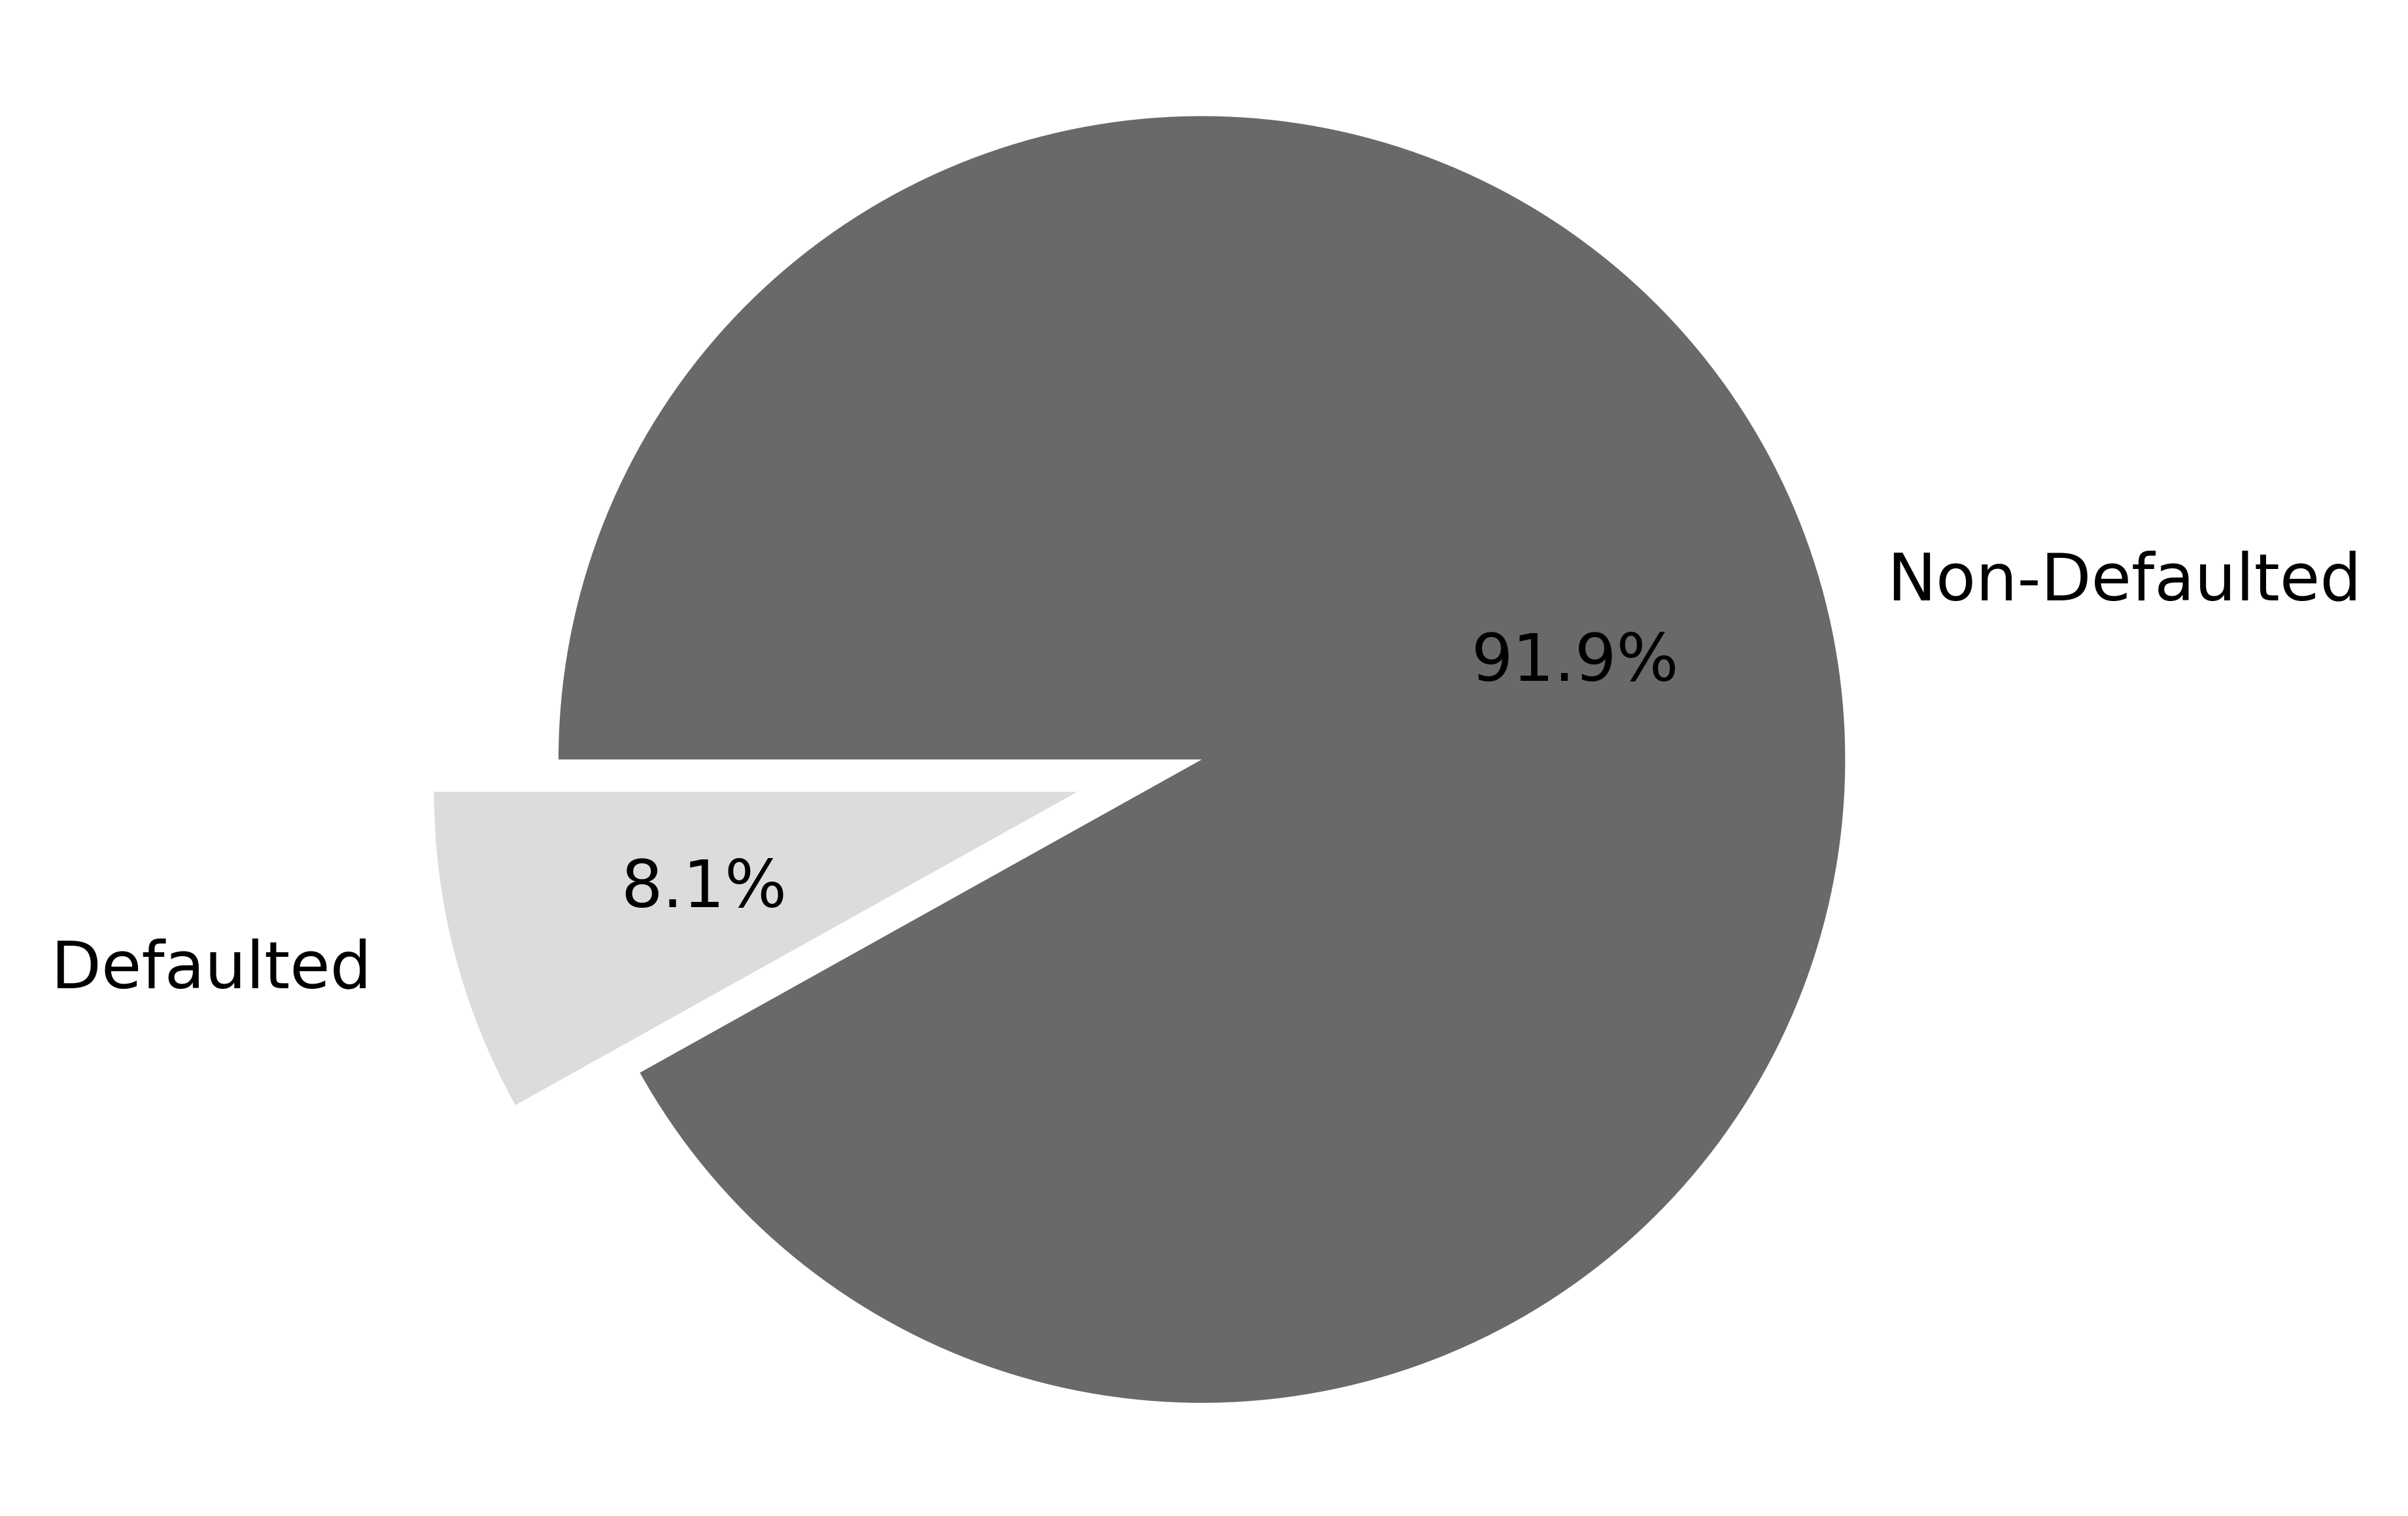

In [271]:
count1 = 0 
count0 = 0
for i in df['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(df['TARGET']))*100
count0 = (count0/len(df['TARGET']))*100

x = ['Defaulted ','Non-Defaulted']
y = [count1, count0]

explode = (0.2, 0)  # only "explode" the 1st slice
#colors = sns.color_palette('pastel')[0:5]
#colors = ['#66b3ff','#ffcc99','#99ff99','#ff9999']

fig1, ax1 = plt.subplots(dpi=720)
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',shadow=False, startangle=180,colors=['gainsboro','dimgray'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.title('Data imbalance',fontsize=25)
#fig1.patch.set_facecolor('xkcd:white')
plt.show()

# Separating Categorical and Numerical Variables

In [14]:
def separate(df):
    categorical=[]
    numerical=[]
    for i in df.columns:
        if df[i].nunique() < 50:
            categorical.append(i)
        else:
            numerical.append(i)

    return categorical , numerical

categorical , numerical = separate(df)

print(tabulate({'Categorical' : categorical,
               'Numerical' : numerical },headers=['Categorical','Numerical']))


Categorical          Numerical
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


### User defined function for level 1 analysis of categorical columns
This function will check for the following 
- Unique values 
- Mode 
- Total count of missing values

In [4]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
      

### User defined function for level 1 analysis of categorical columns
This function will check for the following 
- mean
- median 
- Mode 
- Despersion
- Total count of missing values

In [5]:
def info_of_con(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [116]:
def outliers(value):
    r =plt.boxplot(df[value])
    x =r['fliers'][0].get_ydata()       
    df[value] = df[value].replace(x,df[value].median())
    df[value] = df[value].fillna(df[value].median())
    return plt.show()

# BIVARIANT

## Categorical to Categorical

In [ ]:
xx=['NAME_CONTRACT_TYPE','GENDER', 'Car','House','CNT_CHILDREN','WORK_PHONE','HOME_PHONE','MOBILE_REACHABLE','FLAG_EMAIL','OCCUPATION_TYPE','CNT_FAM_MEMBERS','APPLICATION_DAY','TOTAL_DOC_SUBMITTED']
len(xx) 

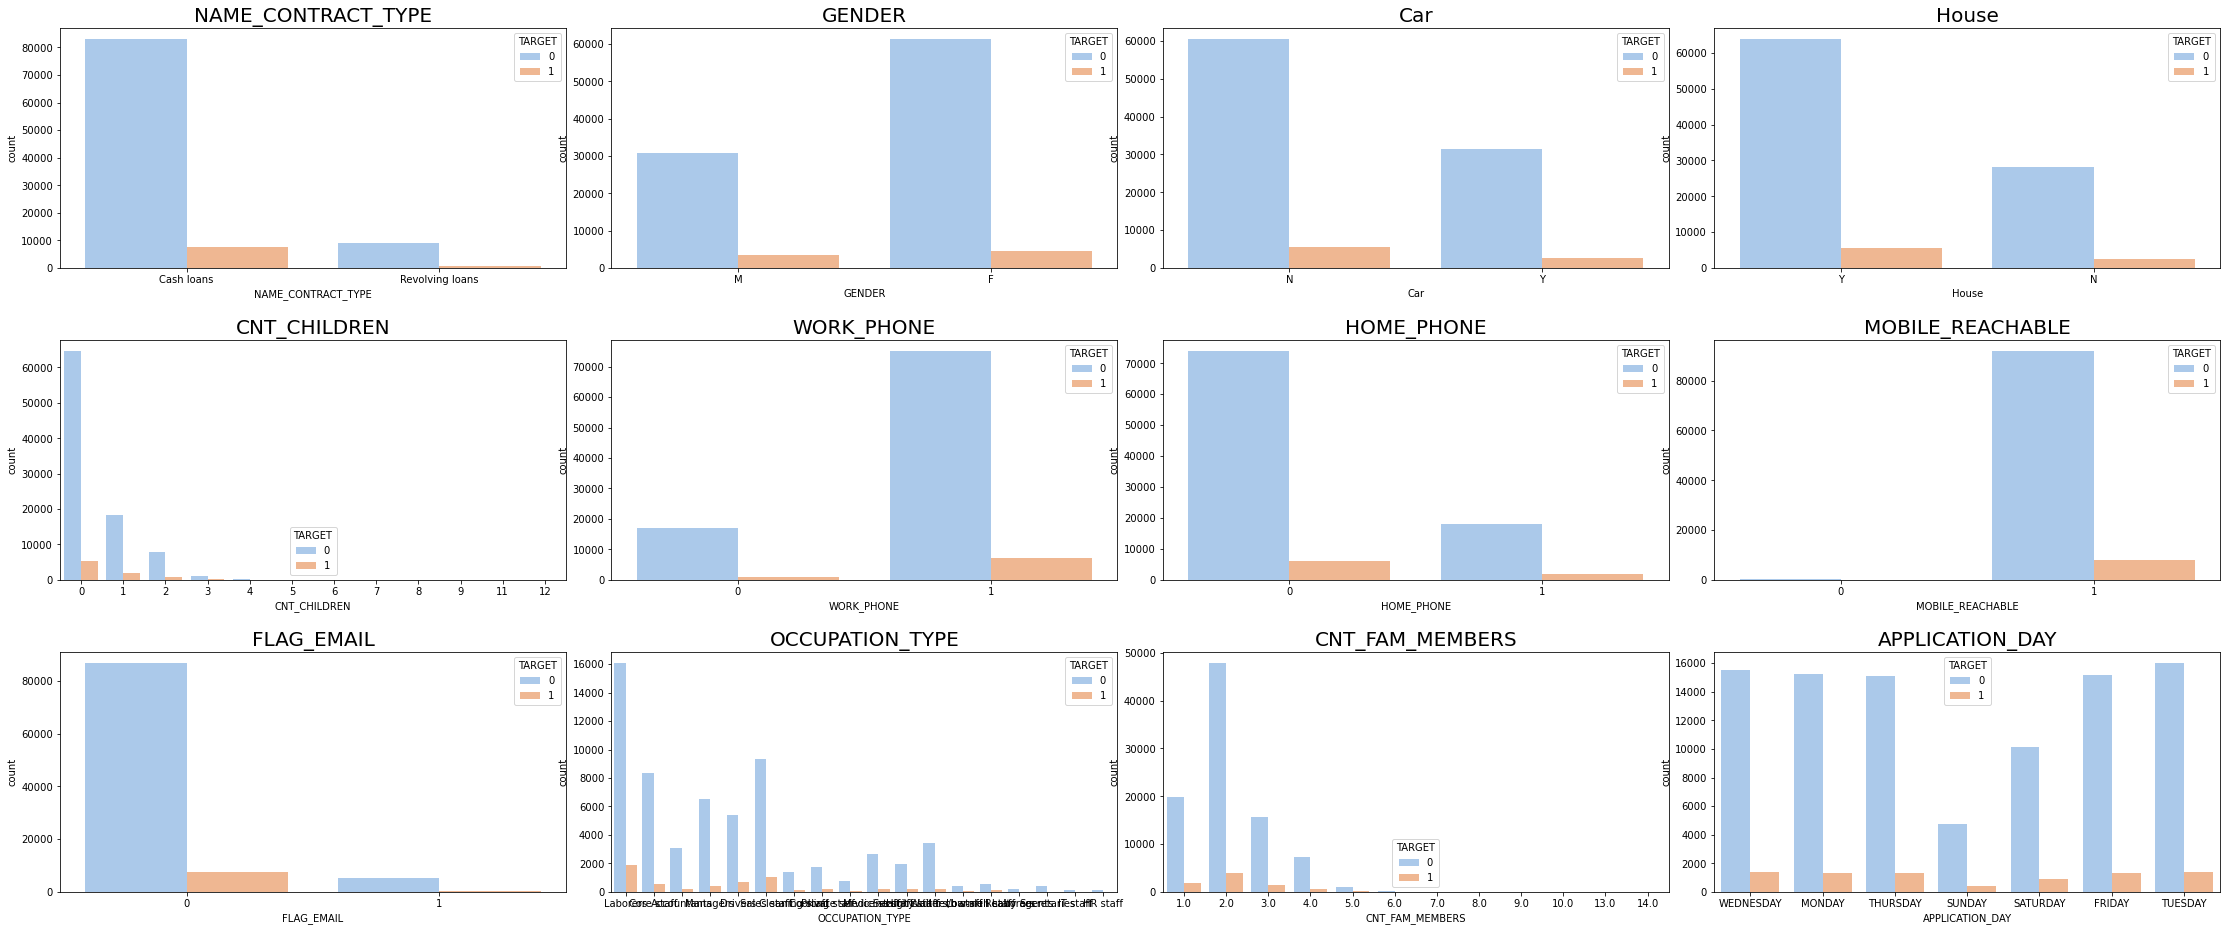

In [111]:
fig , axes = plt.subplots(nrows=3, ncols=4, constrained_layout=True,figsize=(10,1))                 # Plot Configuration 
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)
for ax, column in zip(axes.flatten(),xx): 
    ax.set_title(column,fontsize=20)
    sns.countplot(x = df[column], hue =df['TARGET'], data = df,ax=ax,palette=colors)
    

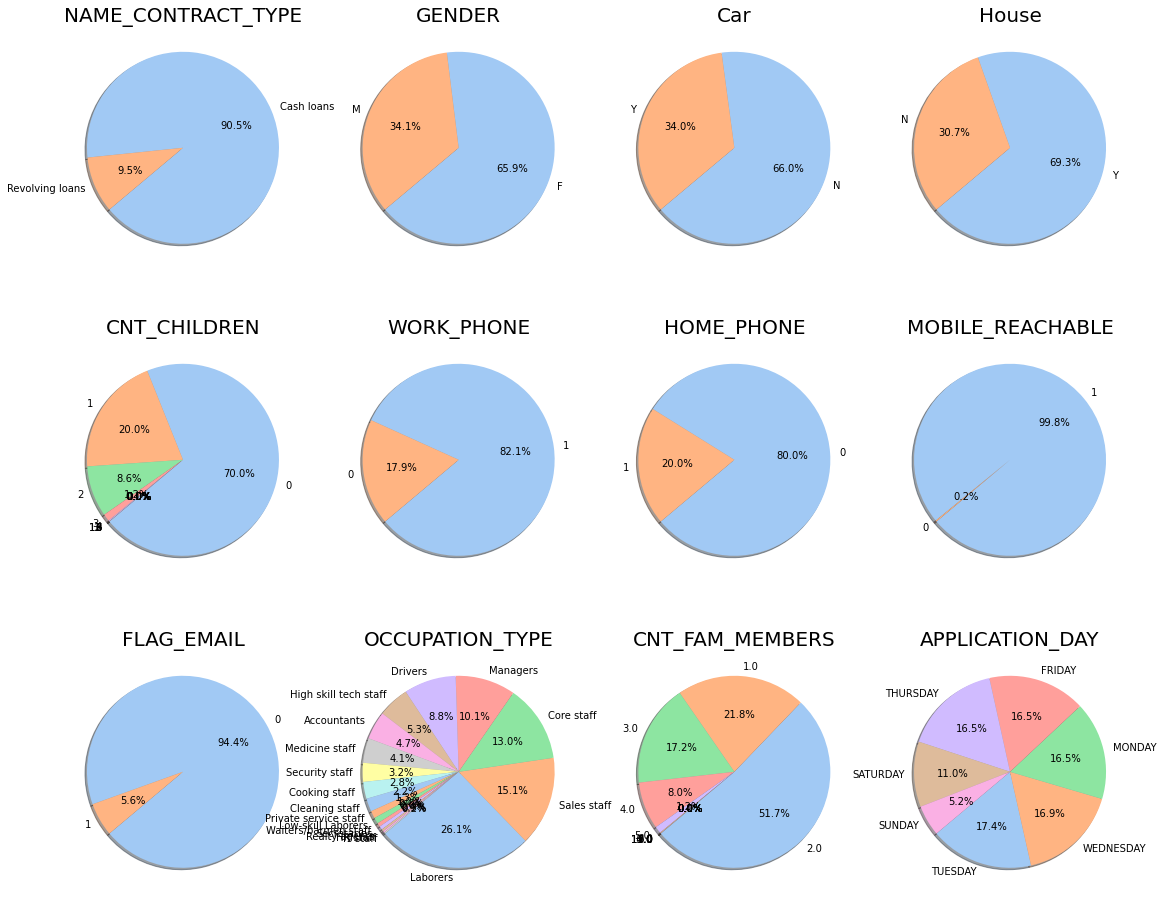

In [153]:
fig , axes = plt.subplots(nrows=3, ncols=4, constrained_layout=True,figsize=(5,1))                 # Plot Configuration 
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)
colors = sns.color_palette('pastel')[0:10]
for ax, column in zip(axes.flatten(),xx): 
    ax.set_title(column,fontsize=20)
    data= df[column].value_counts()
    labels =  data.keys()    #labels = list(data.index)
    #fig.patch.set_facecolor('xkcd:white')
    ax.pie(data,labels =labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=220)

<AxesSubplot:xlabel='TARGET', ylabel='AMT_GOODS_PRICE'>

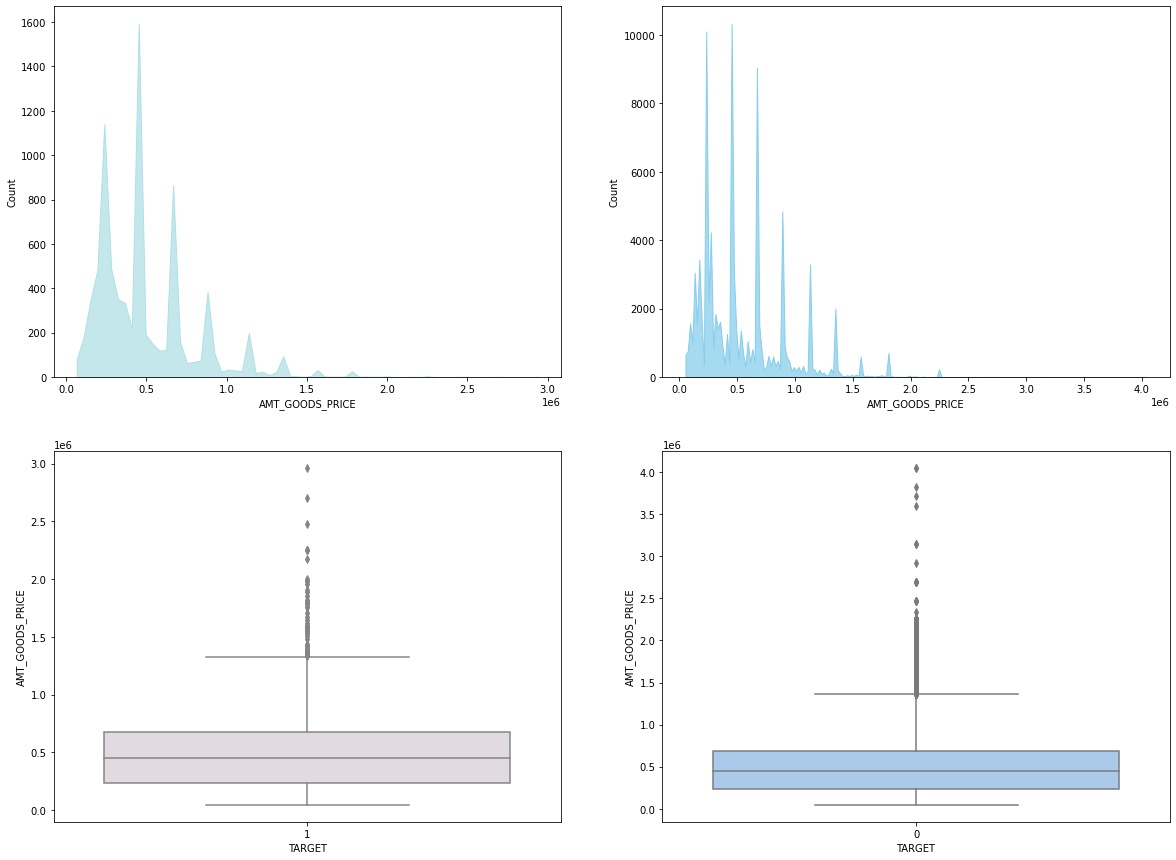

In [227]:
#con(df['AMT_GOODS_PRICE'])
fig, ax = plt.subplots(2, 2, figsize= (20, 15))
sns.histplot(x=tar1['AMT_GOODS_PRICE'],ax=ax[0][0],element='poly',color='powderblue')
sns.histplot(x=tar0['AMT_GOODS_PRICE'],ax=ax[0][1],element='poly',color='skyblue')
#ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 40 , ha = "right")
#ax[0].tick_params(axis="x")
#sns.boxplot(y=a,x = df['city'], ax = ax[1])
sns.boxplot(y=tar1['AMT_GOODS_PRICE'], x= tar1['TARGET'], palette='twilight_shifted_r',ax=ax[1][0])
sns.boxplot(y=tar0['AMT_GOODS_PRICE'], x= tar0['TARGET'], palette=colors,ax=ax[1][1])
#plt.xlim([0,1200]);

    

<AxesSubplot:xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

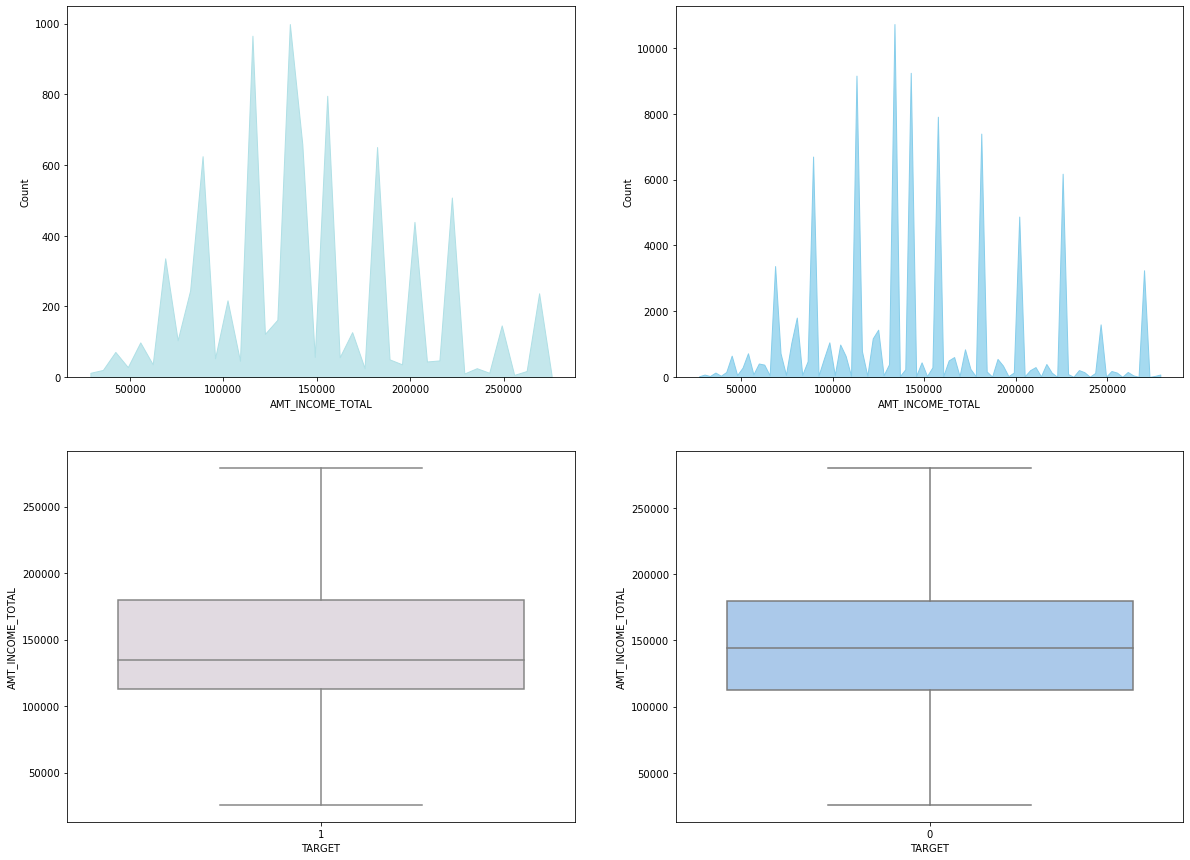

In [224]:
#con(df['AMT_GOODS_PRICE'])
fig, ax = plt.subplots(2, 2, figsize= (20, 15))
sns.histplot(x=tar1['AMT_INCOME_TOTAL'],ax=ax[0][0],element='poly',color='powderblue')
sns.histplot(x=tar0['AMT_INCOME_TOTAL'],ax=ax[0][1],element='poly',color='Skyblue')
#ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 40 , ha = "right")
#ax[0].tick_params(axis="x")
#sns.boxplot(y=a,x = df['city'], ax = ax[1])
sns.boxplot(y=tar1['AMT_INCOME_TOTAL'], x= tar1['TARGET'], palette='twilight_shifted_r',ax=ax[1][0])
sns.boxplot(y=tar0['AMT_INCOME_TOTAL'], x= tar0['TARGET'], palette=colors,ax=ax[1][1])

#plt.xlim([0,1200]);


<AxesSubplot:xlabel='TARGET', ylabel='AMT_CREDIT'>

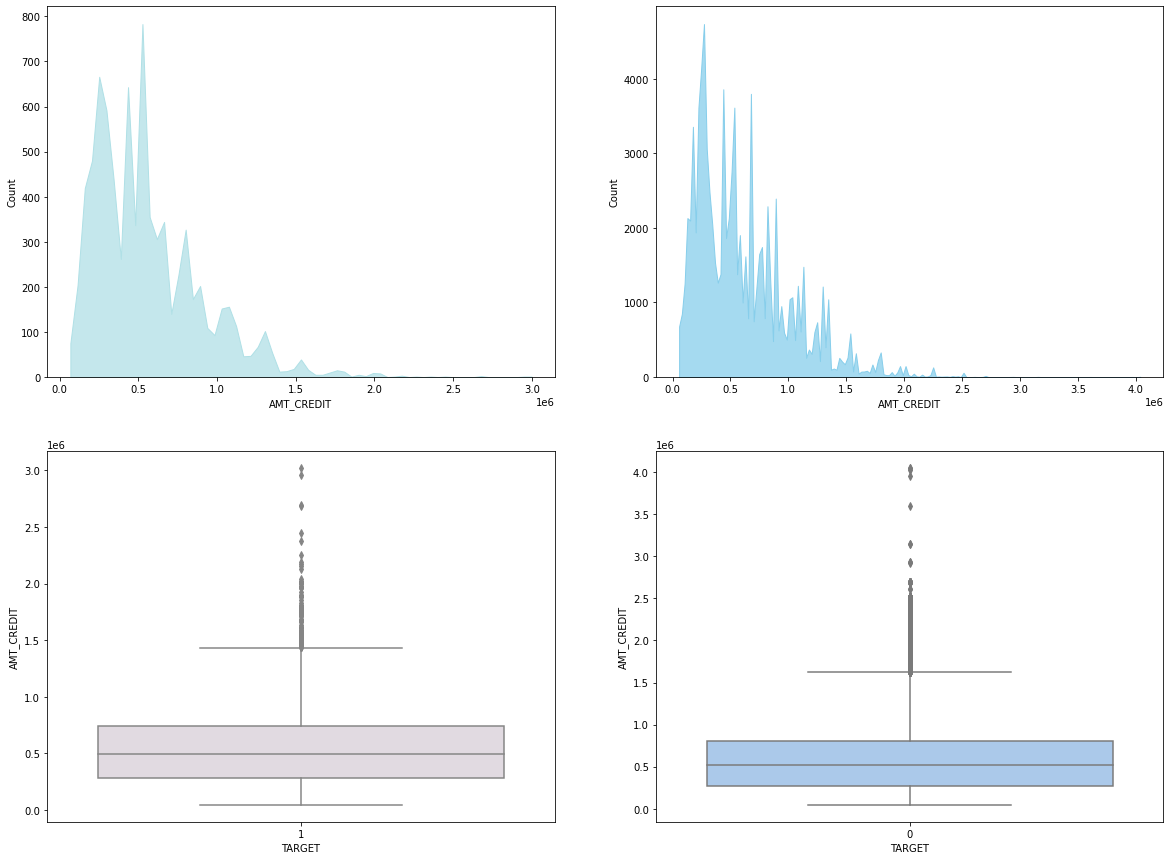

In [223]:
fig, ax = plt.subplots(2, 2, figsize= (20, 15))
sns.histplot(x=tar1['AMT_CREDIT'],ax=ax[0][0],element='poly',color='powderblue')
sns.histplot(x=tar0['AMT_CREDIT'],ax=ax[0][1],element='poly',color='Skyblue')
#ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 40 , ha = "right")
#ax[0].tick_params(axis="x")
#sns.boxplot(y=a,x = df['city'], ax = ax[1])
sns.boxplot(y=tar1['AMT_CREDIT'], x= tar1['TARGET'],palette='twilight_shifted_r',ax=ax[1][0])
sns.boxplot(y=tar0['AMT_CREDIT'], x= tar0['TARGET'], palette=colors,ax=ax[1][1])
#plt.xlim([0,1200]);


# Multivariant

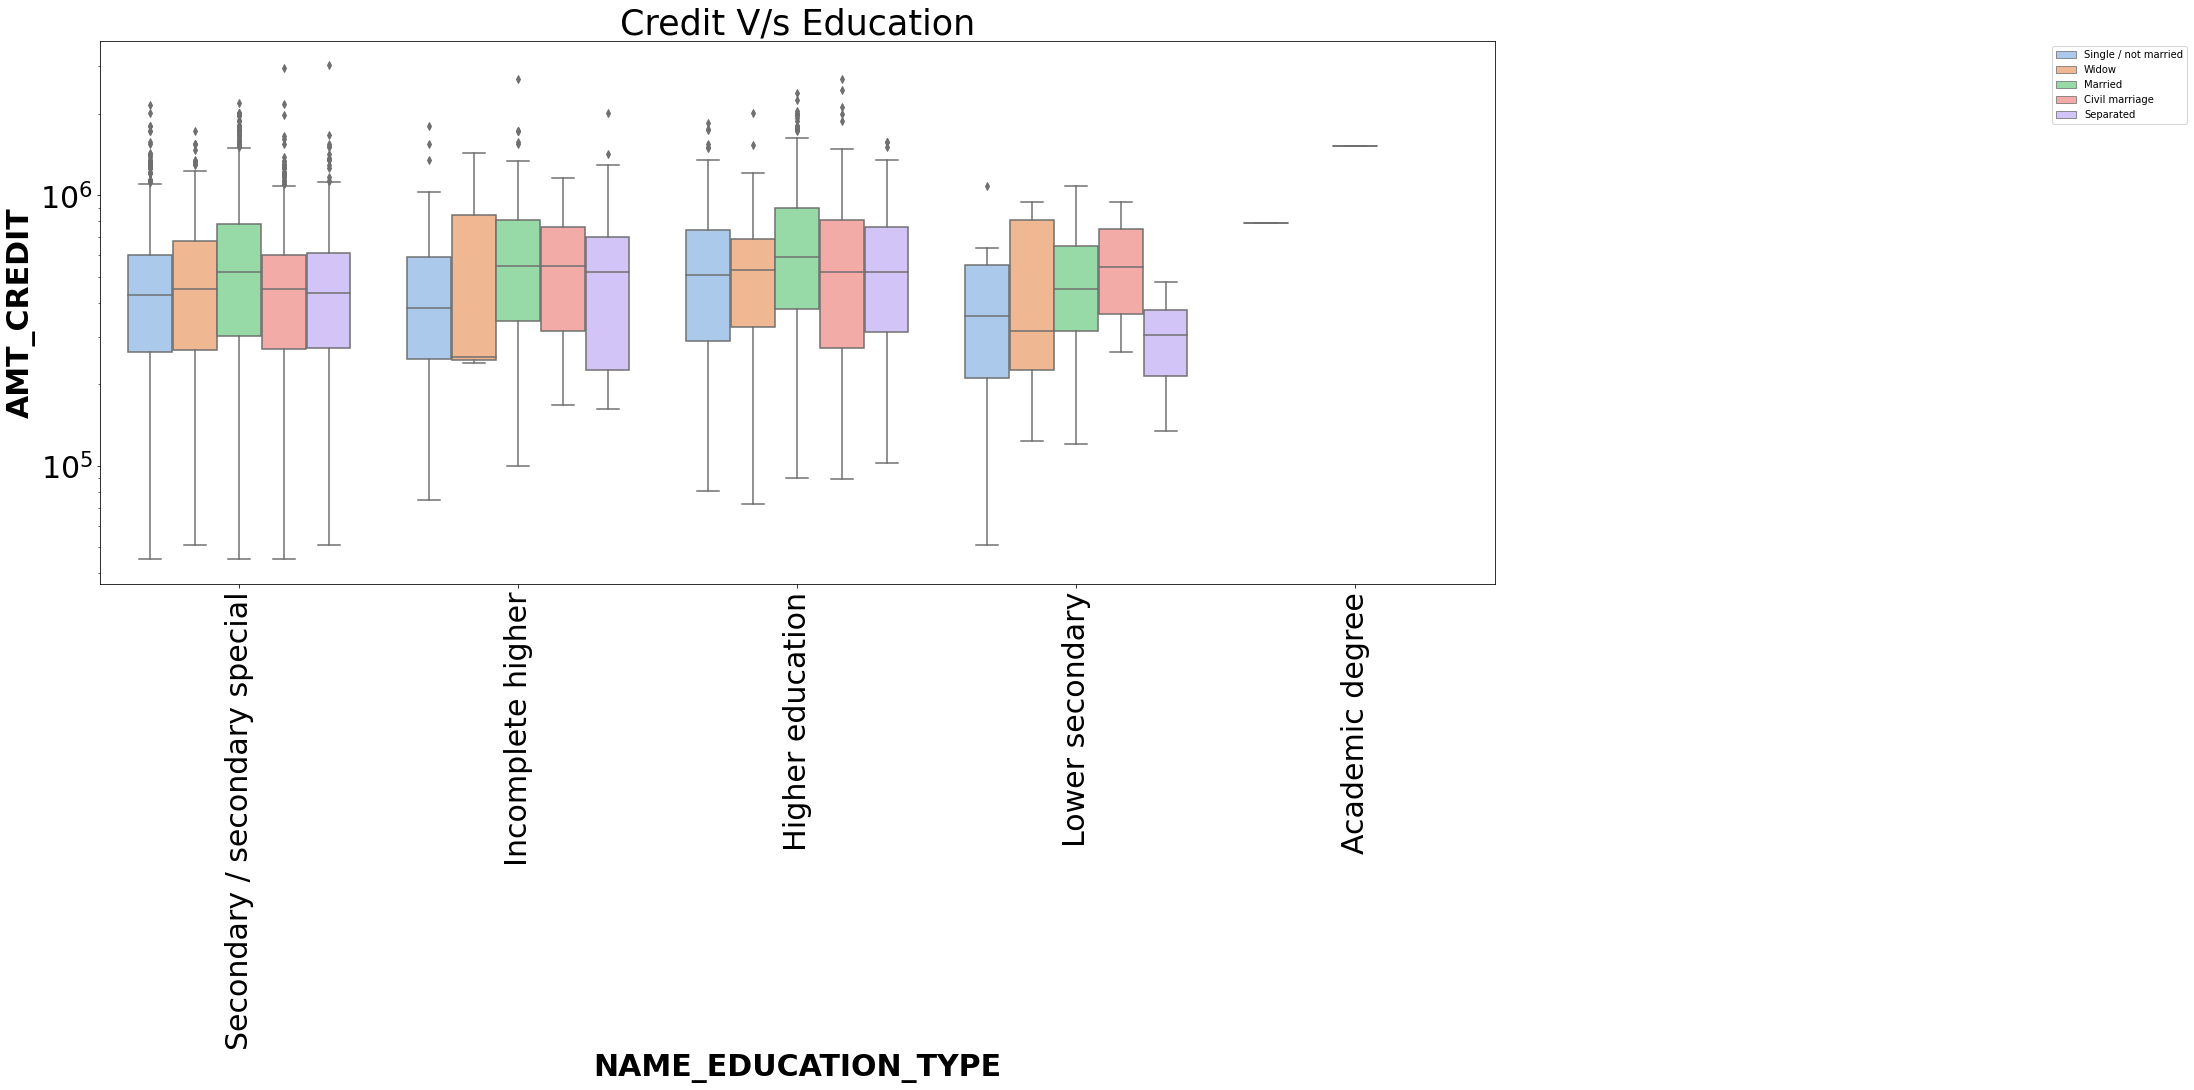

In [240]:
plt.figure(figsize=(25,10))
plt.yscale('log')                      #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =tar1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',           #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette=colors)


plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')            #Adjusting legend position
plt.title('Credit V/s Education',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)
plt.show()

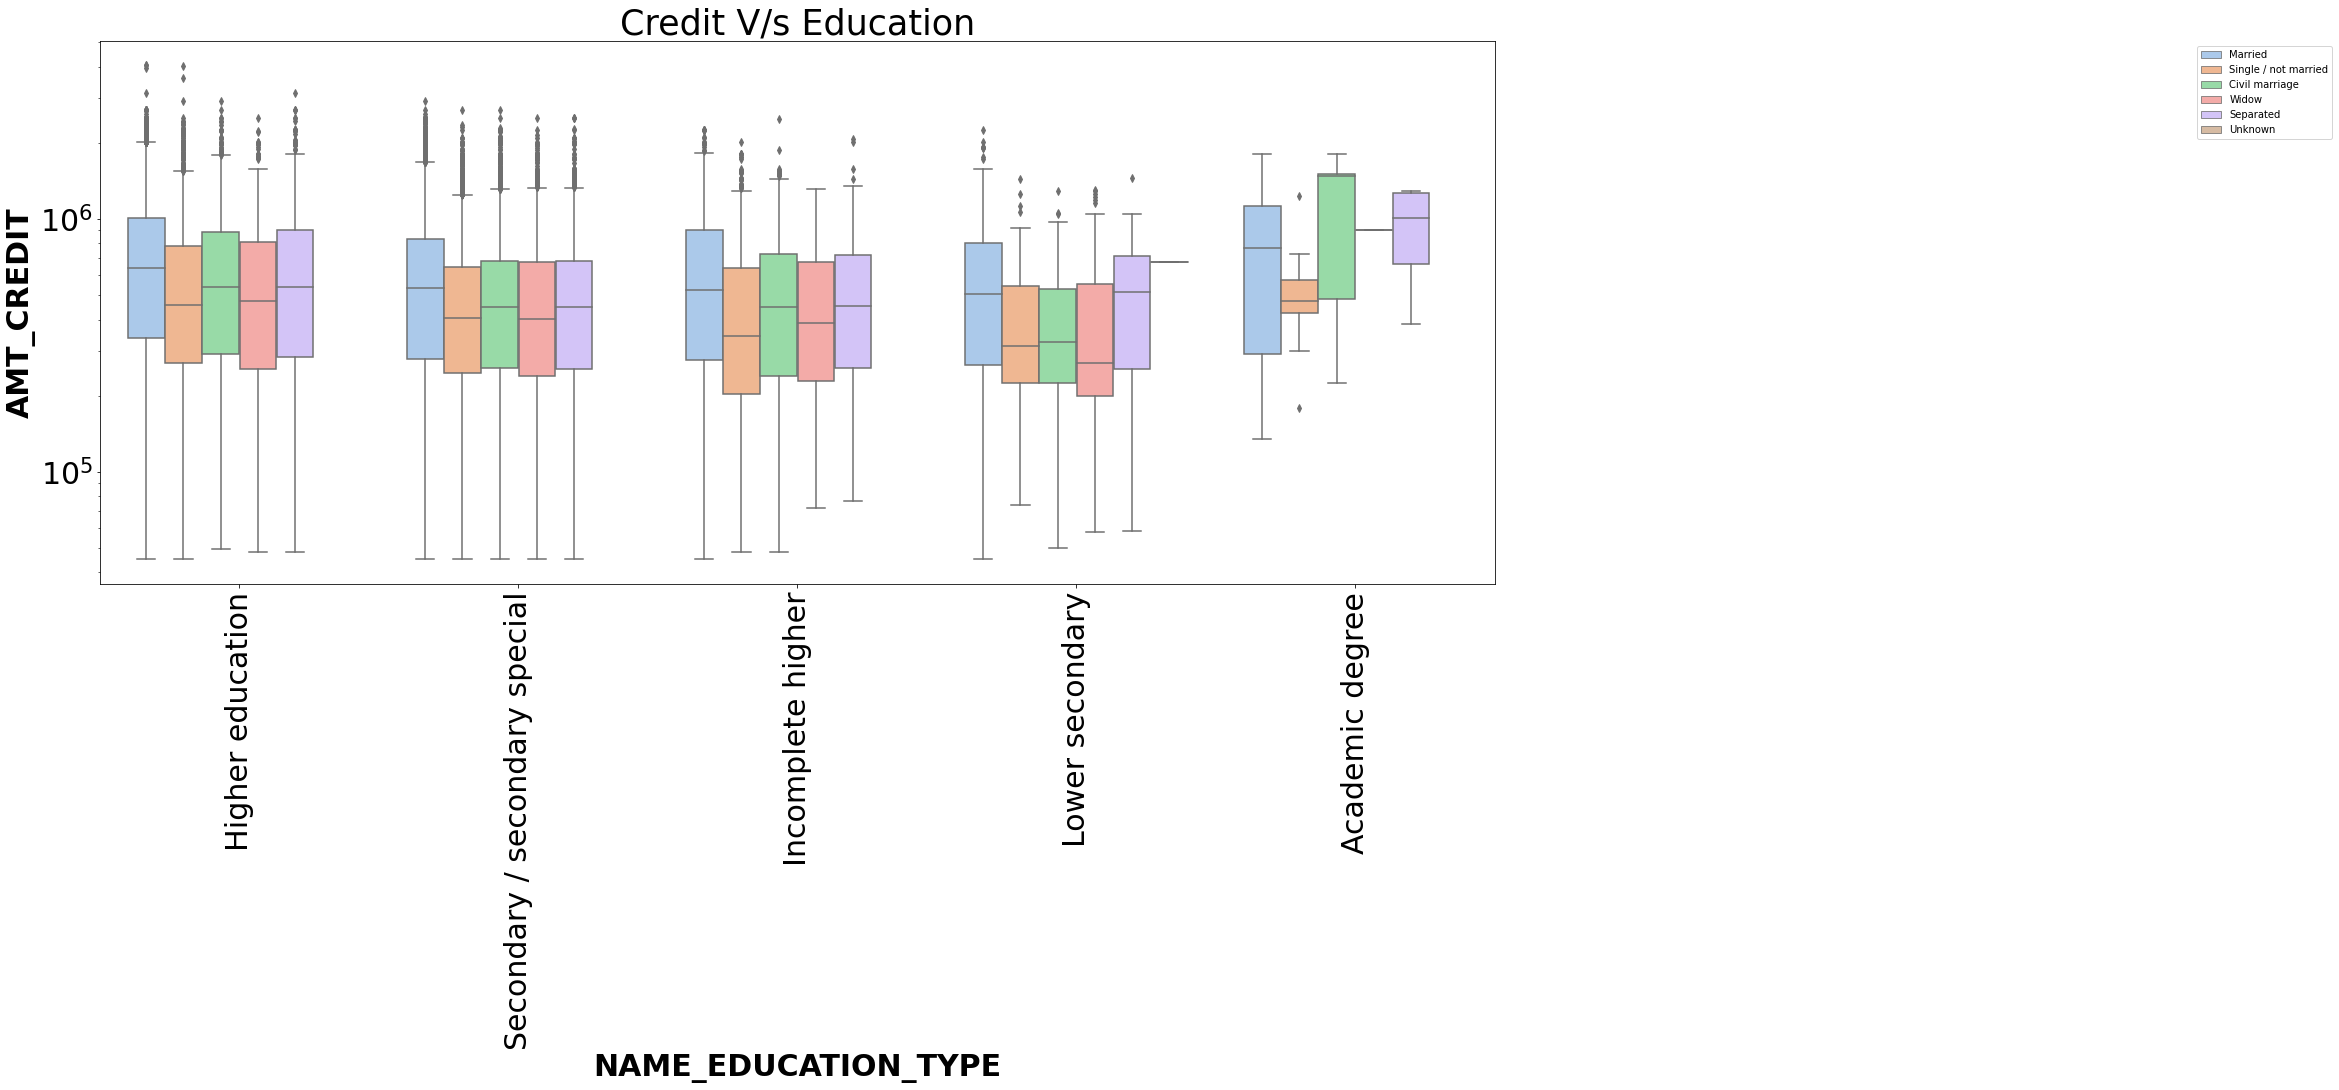

In [239]:
plt.figure(figsize=(25,10))
plt.yscale('log')                      #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =tar0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',           #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette=colors)


plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper left')            #Adjusting legend position
plt.title('Credit V/s Education',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

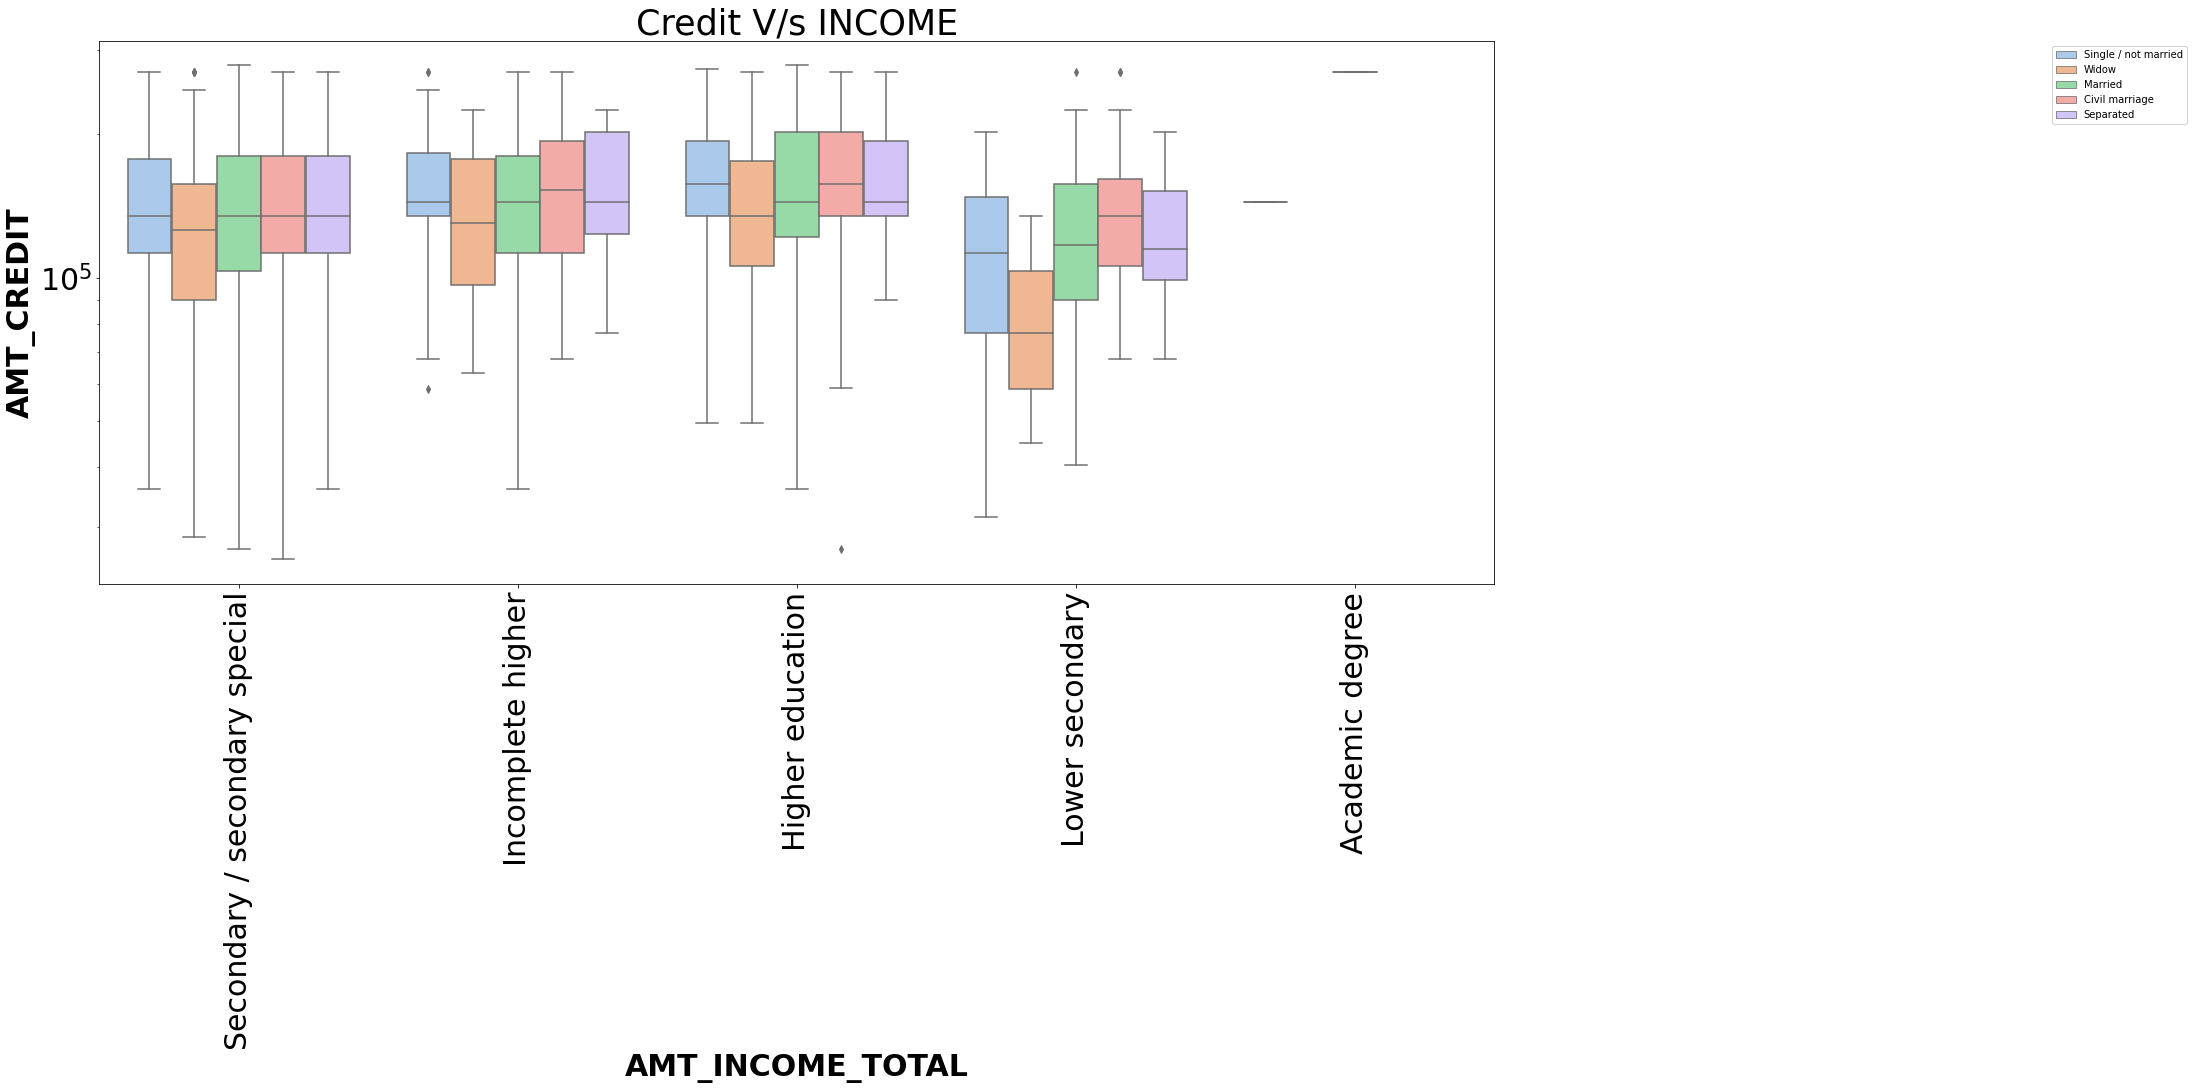

In [245]:
plt.figure(figsize=(25,10))
plt.yscale('log')                      #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =tar1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',           #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette=colors)


plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')            #Adjusting legend position
plt.title('Credit V/s INCOME',fontsize=35 )
plt.xlabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

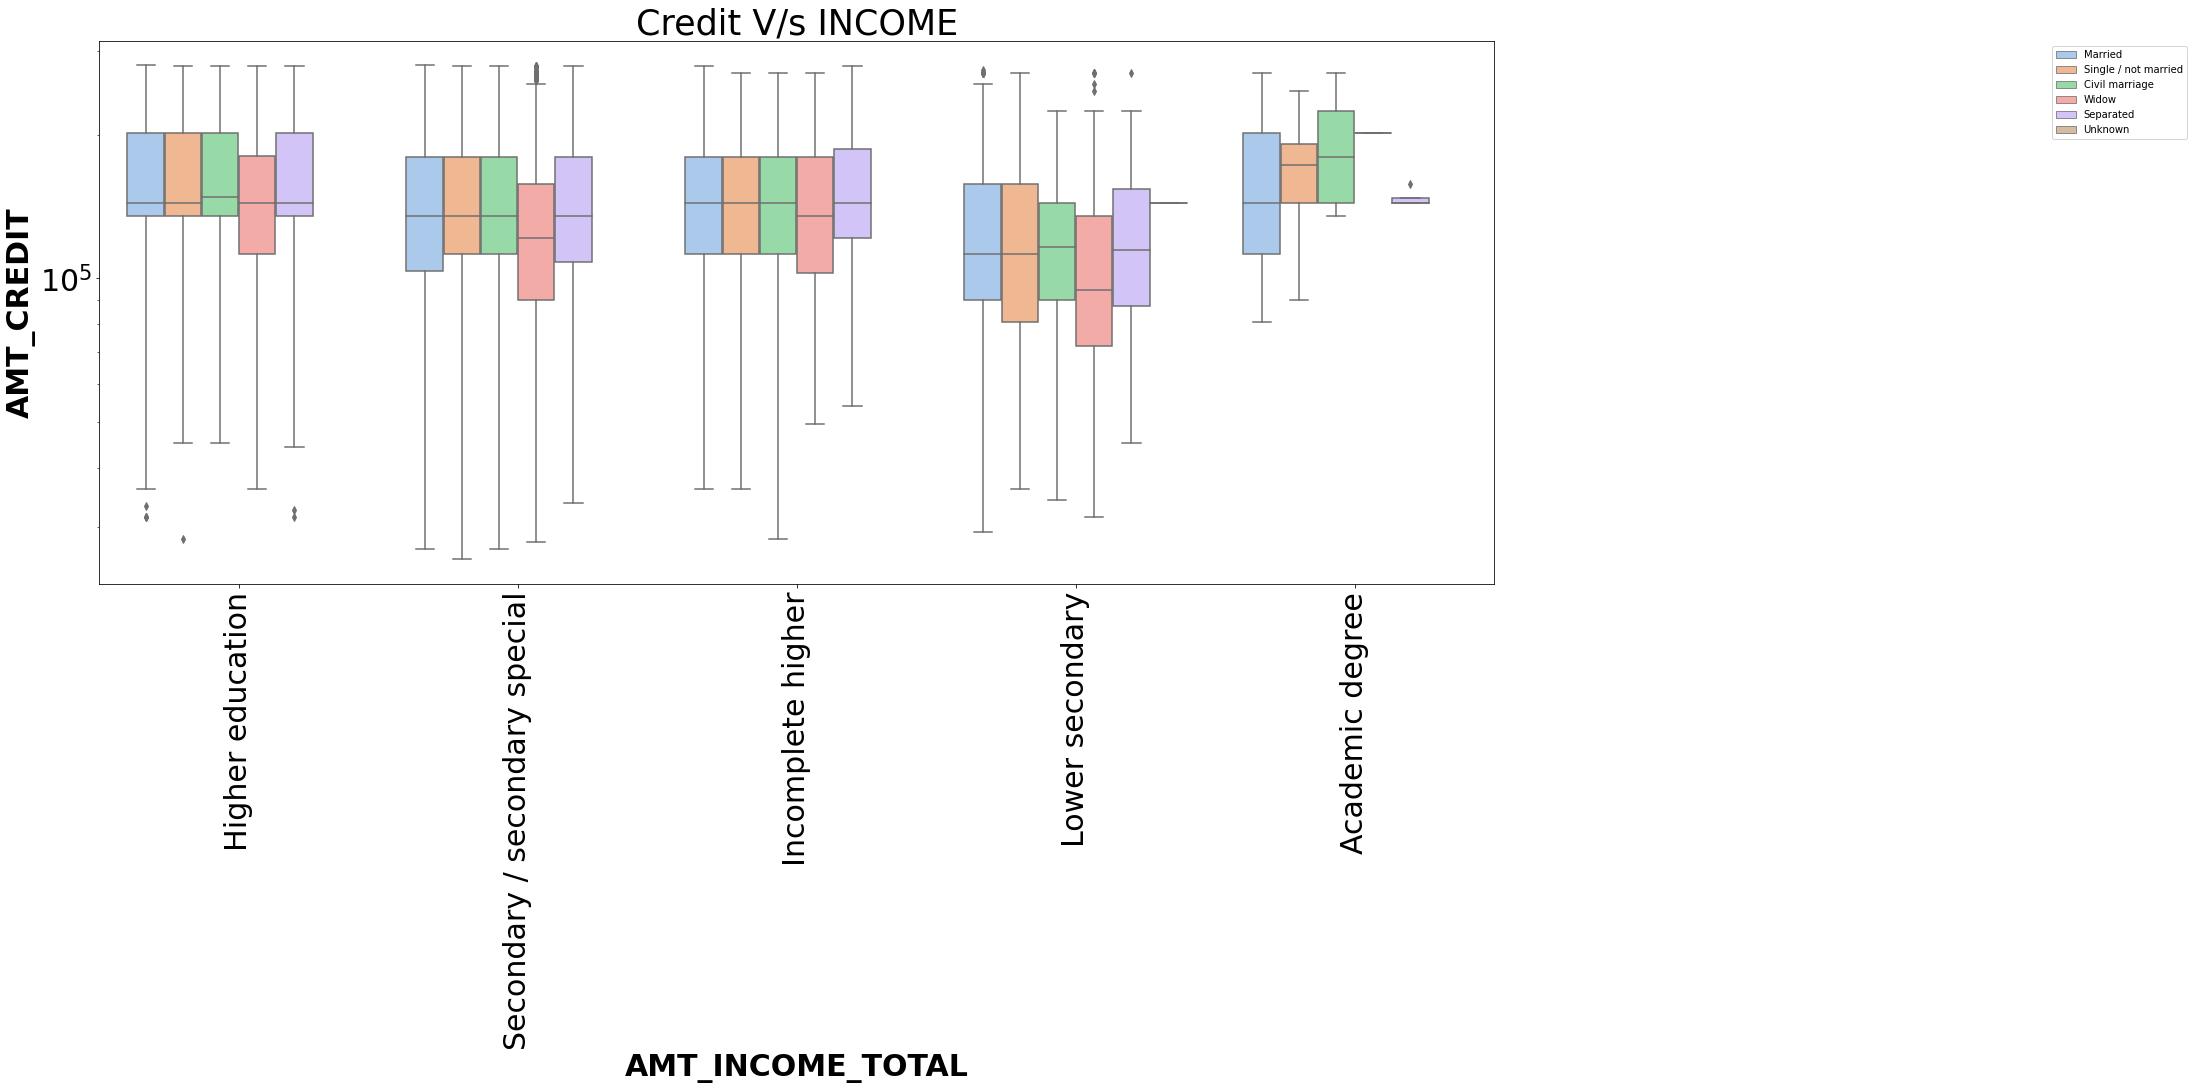

In [244]:
plt.figure(figsize=(25,10))
plt.yscale('log')                      #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =tar0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',           #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette=colors)


plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')            #Adjusting legend position
plt.title('Credit V/s INCOME',fontsize=35 )
plt.xlabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()